# Desigualdades na Mobilidade Urbana no Brasil

### Importando bibliotecas

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

### Importando os dados

In [2]:
# Importando os dados da PNS 2019
pns_df = pd.read_csv("C:/Users/pdaniel/Learning/pns2019.csv")
euro_df = pd.read_excel("C:/Users/pdaniel/Learning/commute_time_europe.xlsx")
print(pns_df)
print(euro_df)

        V0001    V0024    UPA_PNS  V0006_PNS  V0015  V0020  V0022  V0026  \
0          11  1110011  110000016          1      1   2019    6.0      1   
1          11  1110011  110000016          1      1   2019    6.0      1   
2          11  1110011  110000016          1      1   2019    6.0      1   
3          11  1110011  110000016          1      1   2019    6.0      1   
4          11  1110011  110000016          1      1   2019    6.0      1   
...       ...      ...        ...        ...    ...    ...    ...    ...   
293721     53  5310220  530044434         14      1   2019    4.0      2   
293722     53  5310220  530044434         14      1   2019    4.0      2   
293723     53  5310220  530044434         14      1   2019    4.0      2   
293724     53  5310220  530044434         14      1   2019    4.0      2   
293725     53  5310220  530044434         15      8   2019    NaN      2   

        V0031  V0025A  ...  VDE002  VDE014   VDF002  VDF003  VDF004  VDL001  \
0       

### Tratando os dados do PNS 2019

O dataset do PNS possui códigos. Aqui eu trato os dados.

V0001 -> Unidade da federação.

M00402 -> Quanto tempo em minutos o(a) Sr(a) gasta, normalmente, por dia, no deslocamento para o(s) seu(s) trabalho(s), considerando ida e volta. (somente pessoas empregadas) (Resposta em minutos) 

M00401 -> Quanto tempo em horas o(a) Sr(a) gasta(va), normalmente, por dia, no deslocamento para o(s) seu(s) trabalho(s), considerando ida e volta. (somente pessoas empregadas) (Respota em horas)

V0026 -> Tipo de situação censitária (Urbano ou Rural).

VDF004 ->Faixa de rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)
 





Aqui, vou "traduzir" os códigos da Unidade da Federação para os seus respectivos nomes e filtro o dataframe para analisar somente moradores da região urbana do Brasil.



In [3]:
# Criando um dicionário com os códigos da UF (V0001)
code_to_uf = {
    11:'Rondônia',
    12:'Acre',
    13:'Amazonas',
    14:'Roraima',
    15:'Pará',
    16:'Amapá',
    17:'Tocantins',
    21:'Maranhão',
    22:'Piauí',
    23:'Ceará',
    24:'Rio Grande do Norte',
    25:'Paraíba',
    26:'Pernambuco',
    27:'Alagoas',
    28:'Sergipe',
    29:'Bahia',
    31:'Minas Gerais',
    32:'Espírito Santo',
    33:'Rio de Janeiro',
    35:'São Paulo',
    41:'Paraná',
    42:'Santa Catarina',
    43:'Rio Grande do Sul',
    50:'Mato Grosso do Sul',
    51:'Mato Grosso',
    52:'Goiás',
    53:'Distrito Federal'
}

# Criando um dicionário para converter os códigos de localidade (V0026)
code_to_loc = {1:"Urbano",
               2:"Rural"}

# Criando um dicionário para converter os códigos pela faixa de rendimento per capita (partes do salário mínimo)
rendimento_domiciliar = {
    1: "Até 0,25 salário mínimo",
    2: "Mais de 0,25 até 0,5 salário mínimo",
    3: "Mais de 0,5 até 1 salário mínimo",
    4: "Mais de 1 até 2 salários mínimos",
    5: "Mais de 2 até 3 salários mínimos",
    6: "Mais de 3 até 5 salários mínimos",
    7: "Mais de 5 salários mínimos"
}

# Renomeando as colunas
pns_df.rename(columns = {"V0001": "uf"}, inplace=True)
pns_df.rename(columns = {"M00402": "tempo_des_casa_trab_min"}, inplace=True)
pns_df.rename(columns = {"M00401": "tempo_des_casa_trab_hr"}, inplace=True)
pns_df.rename(columns = {"V0026": "localidade"}, inplace=True)
pns_df.rename(columns = {"VDF004": "renda_per_capta"}, inplace=True)

# Convertendo os códigos dos UFs
pns_df["uf"] = pns_df["uf"].map(code_to_uf)
#pns_df["tempo_des_casa_trab"] = pns_df["tempo_des_casa_trab"].fillna(0)

# Convertendo os códigos das localidadews
pns_df["localidade"] = pns_df["localidade"].map(code_to_loc)

# Convertendo os códigos de rendimento domiciliar per capta
pns_df["renda_per_capta"] = pns_df["renda_per_capta"].map(rendimento_domiciliar)

# Filtrando o dataframe somente com as entrevistas de moradores da área urbana.
pns_df = pns_df[pns_df["localidade"] == "Urbano"]

# Transformo o tempo da coluna 'tempo_des_casa_trab_hr' de hora para minutos
pns_df["tempo_des_casa_trab_hr"] = pns_df["tempo_des_casa_trab_hr"]*60

# Crio uma outra coluna para somar o tempo das 'tempo_des_casa_trab_hr' e tempo_des_casa_trab_min' e ter o tempo de deslocamento total
pns_df["tempo_des_total_min"] = pns_df["tempo_des_casa_trab_hr"] + pns_df["tempo_des_casa_trab_min"]

#display(pns_df_urbano)
display(pns_df["renda_per_capta"])


0         Mais de 0,25 até 0,5 salário mínimo
1         Mais de 0,25 até 0,5 salário mínimo
2         Mais de 0,25 até 0,5 salário mínimo
3         Mais de 0,25 até 0,5 salário mínimo
4         Mais de 0,25 até 0,5 salário mínimo
                         ...                 
293253       Mais de 0,5 até 1 salário mínimo
293254       Mais de 1 até 2 salários mínimos
293255       Mais de 1 até 2 salários mínimos
293256       Mais de 1 até 2 salários mínimos
293257                                    NaN
Name: renda_per_capta, Length: 224159, dtype: object

### Tratando os dados da Eurostat

Quero excluir os itens da "Euro area", "European Union" e "Turkey"

In [4]:
#display(euro_df)



# Cria um novo dataframe filtrado
filtred_euro_df = euro_df[3:-1] 

# Multiplico o tempo por dois para ter o tempo de ida e volta.
filtred_euro_df["Tempo (min)"] = filtred_euro_df["Tempo (min)"]*2 


print("Dataframe antes: ","\n", euro_df, '\n\n', "Dataframe depois: ",'\n', filtred_euro_df)

Dataframe antes:  
                                          País Tempo (min)
0   European Union - 27 countries (from 2020)          27
1   European Union - 28 countries (2013-2020)          28
2       Euro area - 19 countries  (2015-2022)          27
3                                     Belgium          28
4                                    Bulgaria          28
5                                     Czechia          30
6                                     Denmark          26
7                                     Germany          28
8                                     Estonia          23
9                                     Ireland          29
10                                     Greece          24
11                                      Spain          27
12                                     France          28
13                                    Croatia          27
14                                      Italy          24
15                                     Cyprus       

C:\Users\pdaniel\AppData\Local\Temp\ipykernel_27092\1406698083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_euro_df["Tempo (min)"] = filtred_euro_df["Tempo (min)"]*2


### Determinando o tempo de deslocamento médio por UF

In [5]:
# Crio um outro dataframe contendo somente as colunas de UF e tempo
tempo_des_uf= pns_df[["uf","tempo_des_total_min"]]

# Calculando o tempo médio por uf
temp_des_medio_uf = tempo_des_uf.groupby("uf", as_index= False)["tempo_des_total_min"].mean()

# Calcula o tempo médio do Brasil
tempo_medio_brasil = temp_des_medio_uf["tempo_des_total_min"].sum()/27
print(f"Tempo de deslocamento médio do Brasil: {tempo_medio_brasil:.2f} minutos")

# Coloco em ordem decrescente por tempo de deslocamento
temp_des_medio_uf.sort_values('tempo_des_total_min', ascending = False, inplace = True)
display(temp_des_medio_uf)


Tempo de deslocamento médio do Brasil: 56.36 minutos


,uf,tempo_des_total_min
20,Rio de Janeiro,87.106460
25,São Paulo,75.562826
6,Distrito Federal,71.362029
4,Bahia,69.165125
16,Pernambuco,67.906535
3,Amazonas,65.015576
15,Pará,64.320364
12,Minas Gerais,63.704805
24,Sergipe,61.383215
7,Espírito Santo,60.963429


Determinando o tempo médio gasto no deslocamento casa-trabalho pelo trabalhor de cada estado.

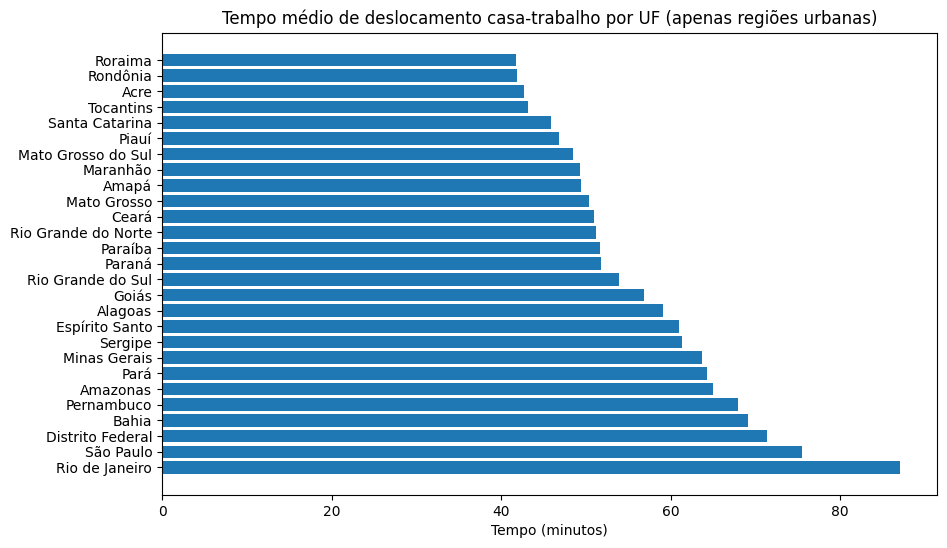

In [6]:
plt.figure(figsize=(10, 6))
plt.barh(temp_des_medio_uf["uf"], temp_des_medio_uf["tempo_des_total_min"])
plt.title('Tempo médio de deslocamento casa-trabalho por UF (apenas regiões urbanas)')
plt.xlabel('Tempo (minutos)')
plt.xticks(rotation=0)
#plt.legend(title='State')

plt.show()

A média do Brasil é de aproximadamente 56,4 minutos por dia ou 4,7 horas por semana. 

### Tempo de deslocamento médio por renda

In [8]:
# Crio um dataframe somente com as colunas de renda familiar per capta e tempo de deslocamento total em minutos
tempo_renda_df = pns_df[["renda_per_capta", "tempo_des_total_min"]]

# Calculando o tempo médio por renda
tempo_medio_renda_df = tempo_renda_df.groupby(tempo_renda_df["renda_per_capta"], as_index = False ).mean()

display(tempo_medio_renda_df)

# Filtrando para eliminar trabalhadores que com renda familiar per capta abaixo de 0,5 salários mínimos
tempo_medio_renda_df_filtrado = tempo_medio_renda_df[2:]
display(tempo_medio_renda_df_filtrado)



,renda_per_capta,tempo_des_total_min
0,"Até 0,25 salário mínimo",55.783961
1,"Mais de 0,25 até 0,5 salário mínimo",59.588697
2,"Mais de 0,5 até 1 salário mínimo",62.036997
3,Mais de 1 até 2 salários mínimos,59.950280
4,Mais de 2 até 3 salários mínimos,58.123821
5,Mais de 3 até 5 salários mínimos,55.173776
6,Mais de 5 salários mínimos,53.045455


,renda_per_capta,tempo_des_total_min
2,"Mais de 0,5 até 1 salário mínimo",62.036997
3,Mais de 1 até 2 salários mínimos,59.950280
4,Mais de 2 até 3 salários mínimos,58.123821
5,Mais de 3 até 5 salários mínimos,55.173776
6,Mais de 5 salários mínimos,53.045455


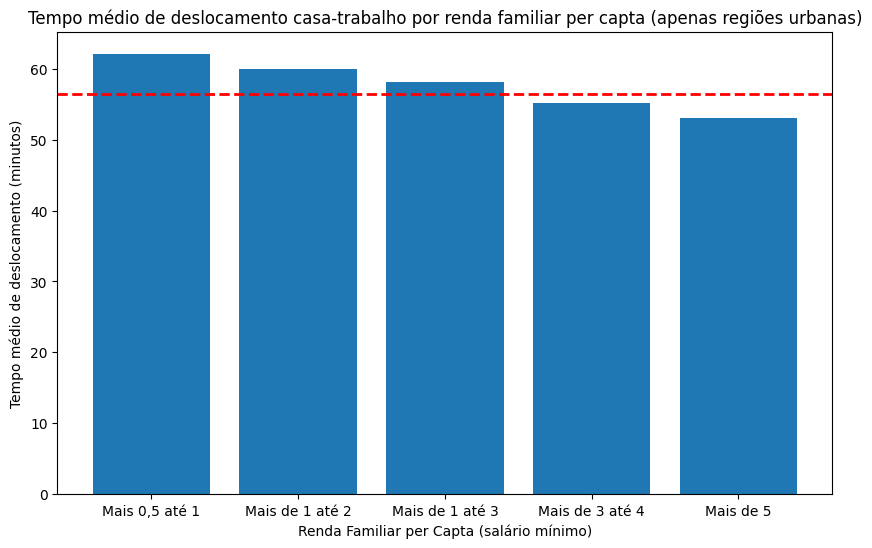

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(tempo_medio_renda_df_filtrado["renda_per_capta"], tempo_medio_renda_df_filtrado["tempo_des_total_min"])
plt.title('Tempo médio de deslocamento casa-trabalho por renda familiar per capta (apenas regiões urbanas)')
plt.xlabel('Renda Familiar per Capta (salário mínimo)')
plt.ylabel('Tempo médio de deslocamento (minutos)')
plt.axhline(y=tempo_medio_brasil,linewidth=2, color='red', linestyle = "--") # Média nacional

# Renomeia as categorias
plt.xticks(tempo_medio_renda_df_filtrado["renda_per_capta"], ['Mais 0,5 até 1', 'Mais de 1 até 2', 'Mais de 1 até 3', 'Mais de 3 até 4', 'Mais de 5'])

#plt.legend(title='State')

plt.show()

Fica claro que o tempo de deslocamento casa-trabalho tem uma relação direta com a renda. Talvez indivíduos com melhores condições financeiras dependam menos de transportes públicos ou more mais perto do grandes centros urbanos.

### Tempo médio de deslocamento por etnia.

### Brasil comparado a Europa

Para essa análise, utilizei os dados dos trabalhos ativos da Europa (de 15 até 74 anos) somente de áreas urbanas

In [10]:
# Cria um novo dataframe adicionando "Brazil" aos países da UE.
brasil_euro_df = filtred_euro_df.append({'País': 'Brazil', "Tempo (min)": round(tempo_medio_brasil)}, ignore_index = True)
brasil_euro_df.sort_values('Tempo (min)', ascending = False, inplace = True) # Coloca em ordem decrescente por tempoi
    
#display(brasil_euro_df)

C:\Users\pdaniel\AppData\Local\Temp\ipykernel_27092\1394436080.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  brasil_euro_df = filtred_euro_df.append({'País': 'Brazil', "Tempo (min)": round(tempo_medio_brasil)}, ignore_index = True)


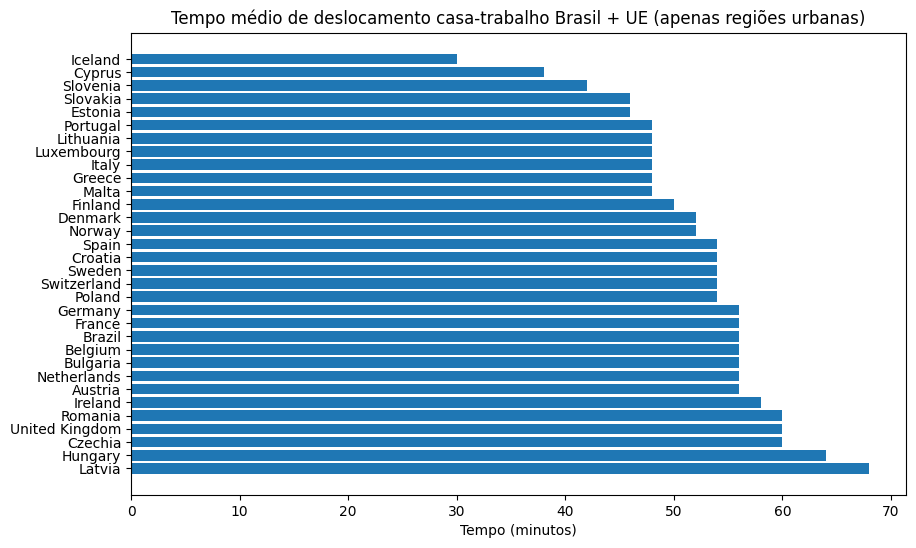

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(brasil_euro_df["País"], brasil_euro_df["Tempo (min)"])
plt.title('Tempo médio de deslocamento casa-trabalho Brasil + UE (apenas regiões urbanas)')
plt.xlabel('Tempo (minutos)')
plt.xticks(rotation=0)
#plt.legend(title='State')

plt.show()